## Kaggle Classification Competition

@ Explore Data Science Academy

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading the data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Model Building & Evaluation</a>

<a href=#seven>6. Submission</a>



<a id="one"></a>
## 1. Introduction
<a class="anchor" id="1"></a>
<a href=#cont>Back to Table of Contents</a>


South Africa's Constitution recognises 11 official languages: Sepedi (also known as Sesotho sa Leboa), Sesotho, Setswana, siSwati, Tshivenda, Xitsonga, Afrikaans, English, isiNdebele, isiXhosa and isiZulu.
Language is another way of communication that human being's use. Languages exposes people to new opportunities and offers chances to travel,explore,talk to people accross the globe.

They also allow us to articulate our thoughts and feelings by the way we apprehend the world. We live in exciting times where on can be able to feed machine raw text so that it can understand human lanuage, which is Natural Language Processing. 
In this We will be going through all the steps to make the machine understand South African languages then roduce a multilabel language id of the specified language. 

<a id="two"></a>
## 2. Importing Libraries
<a class="anchor" id="1"></a>
<a href=#cont>Back to Table of Contents</a>


In [85]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import advertools as adv
import nltk
from nltk.corpus import stopwords
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch


from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Libraries from Sklearn
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingRegressor

import warnings
warnings.filterwarnings("ignore")

<a id="three"></a>
## 3. Loading Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


## Loading Data

In [2]:
train_data = pd.read_csv('train_set.csv')

In [3]:
test_data = pd.read_csv('test_set.csv')

<a id="four"></a>
## 4. Exploratory Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [4]:
train_data.shape

(33000, 2)

In [5]:
test_data.shape

(5682, 2)

In [6]:
train_data.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [7]:
train_data.tail()

,lang_id,text
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999,sot,mafapha a mang le ona a lokela ho etsa ditlale...


In [8]:
test_data.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


## Checking for null values

In [9]:
train_data.isnull().sum()

lang_id    0
text       0
dtype: int64

In [10]:
test_data.isnull().sum()

index    0
text     0
dtype: int64

**Observation**

There are no null values in both the training and testing dataset.

## Target Variable Analysis

In [11]:
train_data['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

**Observation**

There are 11 unique languages which are written in codes.

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


**Observation**

There are only two object datatypes.

### Distrubution of the Language ID

In [13]:
train_data['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

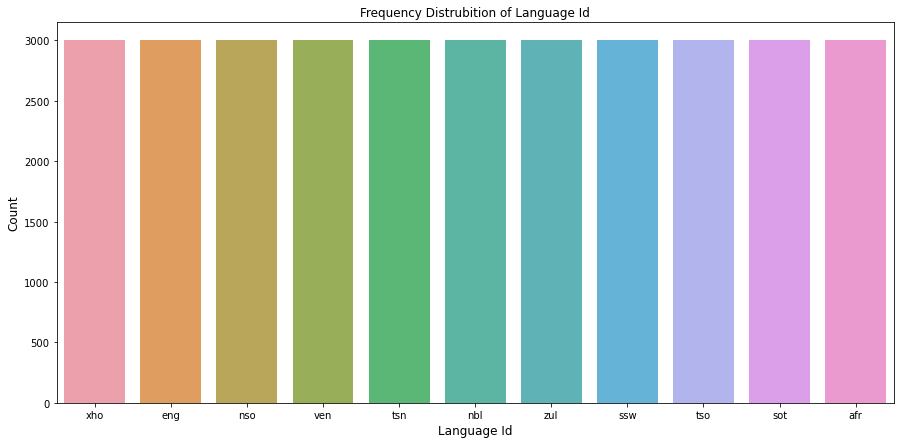

In [120]:
language_count = train_data['lang_id'].value_counts()
plt.figure(figsize=(15,7))
sns.barplot(language_count.index, language_count.values, alpha=0.9)
plt.title('Frequency Distrubition of Language Id')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Language Id', fontsize=12)
plt.show()

**Observation**

There is an equal number of language distrubution, then there will not be any imbalanced data going forward, because durung model training the model will be exposed to all categories of the data.

## Checking for Emojis in text coloumn

**Used AdvertTools module to extract any emojies from text **
The emojis will be unecessary for model building 

In [14]:
emoji_summary = adv.extract_emoji(train_data['text'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

In [15]:
emoji_summary['overview']

{'num_posts': 33000,
 'num_emoji': 17,
 'emoji_per_post': 0.0005151515151515151,
 'unique_emoji': 2}

**Observation**

There are 17 number of emoji's used and two unique emoji's used.

In [16]:
emoji_summary['top_emoji']

[('©', 14), ('™', 3)]

In [17]:
emoji_summary['top_emoji_text']

[('copyright', 14), ('trade mark', 3)]

## Pre Processing

Data Cleaning is to remove nosie from the dataset which may include errors, punctuation marks, duplicates, Url etc in order to create a reliable dataset. This improves the quality of the training data for model building.In this case for Natural Language Processing so that the machine can understand human language.

The **function** below will remove noise from the dataset.

In [38]:
def clean_text(text):
    text = remove_emojis(text)
    text = remove_single_letters(text)
    text = re.sub('©*', '',text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', text) 
    text = text.replace('\\\\', '')
    text = text.replace('\\', '')
    return text

In [39]:
def remove_emojis(text):
    words = text.split()
    reformed = []
    for w in words:
        if w != '©' or w != '™':
            reformed.append(w)
    text = " ".join(reformed)
    return text 

In [40]:
def remove_single_letters(text):
    words = text.split()
    reformed = []
    for w in words:
        if len(w) > 1:
            reformed.append(w)
    text = " ".join(reformed)
    return text 

In [43]:
train_data['clean_text'] = train_data['text'].apply(lambda text:clean_text(text))
test_data['clean_text']= test_data['text'].apply(lambda text:clean_text(text))

In [44]:
train_data

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,netefatša gore ba file dilo ka moka tše le dum...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,modise mosadi na ntse sa utlwe hore thabang ra...
32997,eng,closing date for the submission of completed t...,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,nawuphina umntu ofunyenwe enetyala phantsi kwa...


Now let us remove stops words from english text, lemmatize then tokenize.

### Tokenize

In [45]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
train_data['tokens'] = train_data['clean_text'].apply(tokeniser.tokenize)
test_data['tokens'] = test_data['clean_text'].apply(tokeniser.tokenize)

### Lemmatize

In [46]:
#Functions for lemmatize of the words
from nltk.stem import WordNetLemmatizer

def lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [47]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmatizer = WordNetLemmatizer()
train_data['lemma'] = train_data['tokens'].apply(lemma, args=(lemmatizer, ))
test_data['lemma'] = test_data['tokens'].apply(lemma, args=(lemmatizer, ))


## Removal of stop words

By research **nltk** only supports 21 global languages, so far South African language stop words have not been craeted. Therefore only english stopwords will be removed.

In [48]:
def remove_stop_words(tokens):
    return [t for t in tokens if t not in stopwords.words('english')]

In [49]:
#Apply the stop function to dataframe and genrate a new column
train_data['no_stop_words'] = train_data['lemma'].apply(remove_stop_words)
test_data['no_stop_words'] = test_data['lemma'].apply(remove_stop_words)

<a id="five"></a>
## 5. Model Building
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


## Model Training

In [121]:
# Dividing Data to Training and Validation Sets
from sklearn.model_selection import train_test_split  
x = train_data.no_stop_words
y = train_data.lang_id.values
x = train_data.no_stop_words.astype(str)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 20) #using a 20% test size


## Vectorization

Converting the words into numbers so that the machine will be able to read them.

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() #instantiating the vectorizer
train_vectors = vectorizer.fit_transform(x_train)

val_vectors = vectorizer.transform(x_val)
print("Shape of training data : ",train_vectors.shape, "\nShape of validation data : ",val_vectors.shape)

Shape of training data :  (26400, 125967) 
Shape of validation data :  (6600, 125967)


### Splitting the dataset into training and testing

We will first split our dataset before model building.

In [93]:
# Dividing Data to Training and Validation Sets
from sklearn.model_selection import train_test_split  
x = train_data.no_stop_words
y = train_data.lang_id.values
x = train_data.no_stop_words.astype(str)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

In [94]:
vect = CountVectorizer(stop_words='english', min_df= .01)
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)


Below are the names of the classifiers which the splitted data will be trained on.

In [103]:
names = ['Nearest Neighbors',
         'Linear SVM', 'RBF SVM',
         'Decision Tree', 'Random Forest',  'AdaBoost', "Naive Bayes"]

In [104]:
classifiers = [ 
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    MultinomialNB(0.05)
]

In [111]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred,average='weighted')
    recall    = metrics.recall_score(y_train, y_pred,average='weighted')
    
    f1        = metrics.f1_score(y_train, y_pred,average='weighted')    
    f1_test   = metrics.f1_score(y_test, y_pred_test,average='weighted')    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
... All done!


In [112]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
RBF SVM,0.940265,0.944819,0.940265,0.940498,0.452374,78.065662
Naive Bayes,0.909053,0.911438,0.909053,0.907614,0.901027,0.053567
Linear SVM,0.897348,0.912032,0.897348,0.898075,0.891406,3.153578
Nearest Neighbors,0.849583,0.884916,0.849583,0.849789,0.815920,0.027062
Random Forest,0.630455,0.778231,0.630455,0.630679,0.621804,0.066762
Decision Tree,0.531894,0.736797,0.531894,0.484912,0.470152,0.046994
AdaBoost,0.535000,0.602367,0.535000,0.478536,0.473267,2.090280


### Observation from model performances

From the table above which iilustrated the results for all the classifiers, we can that the AdaBoost performed the worst and the Naive Bayes yas the highest accuracy score. Therefore the method above will be used for the final submission.

### MultinomialNB Model

In [74]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB(0.05) #setting our alpha parameter as 0.05
# Fit the model 
naive_bayes.fit(train_vectors, y_train)

C:\Users\makga\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass alpha=0.05 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


MultinomialNB(alpha=0.05)

In [68]:
x = test_data.no_stop_words.astype(str)
test_vectors = vectorizer.transform(test_data.no_stop_words.astype(str))

In [125]:
print("\nLet us see the peformance of our model by the F1 test.")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predicted = naive_bayes.predict(test_vectors)



Let us see the peformance of our model by the F1 test.


<AxesSubplot:xlabel='Classifier'>

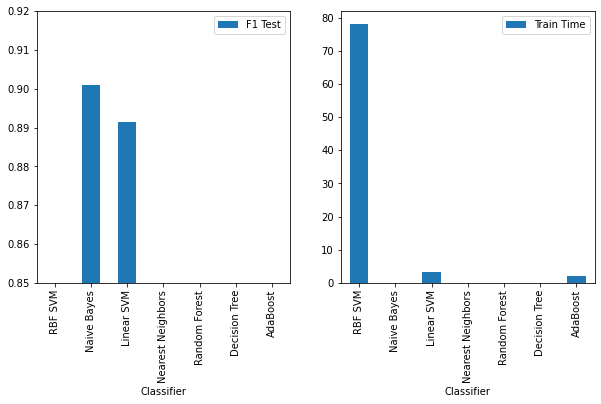

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.85,0.92])
results.plot(y='Train Time', kind='bar', ax=ax[1])

In [71]:
print("Results : \n")
results = pd.DataFrame({'index' : test_data['index'].astype(str), 'lang_id' : predicted}, 
                       columns = ['index', 'lang_id'])
print(results)
results.to_csv("Naive_model2.csv", sep= ",", index = False)
print("-" * 50)

print("Analysis on the test dataset.. \n")
d = results['lang_id'].value_counts(normalize = True) * 100

Results : 

     index lang_id
0        1     afr
1        2     tsn
2        3     tso
3        4     afr
4        5     eng
...    ...     ...
5677  5678     ssw
5678  5679     ven
5679  5680     nbl
5680  5681     ssw
5681  5682     xho

[5682 rows x 2 columns]
--------------------------------------------------
Analysis on the test dataset.. 



<a id="six"></a>
## 6. Submission
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


## Save model into pickle

In [137]:
import pickle

model_save_path = 'naive_bayes3.pkl'

with open(model_save_path, 'wb') as file:
    pickle.dump(naive_bayes,file)

In [138]:
model_load_path = 'naive_bayes3.pkl'

with open(model_load_path, 'rb') as file:
    unpickled_model = pickle.load(file)

In [140]:
y_pred = unpickled_model.predict(test_vectors)

### What to improve on :

Use Stacking which is an ensemble machine learning algorithm.
It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms.

## References 

 * For unicodes emojies https://apps.timwhitlock.info/emoji/tables/unicode

* Stop language words code https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes